# Банки — Сегментация пользователей по потреблению

# Описание данных
Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:
- USERID — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — количество баллов собственности,
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- EST_SALARY — оценочный доход клиента,
- сhurn — признак оттока.

# Цель работы
Проанализируйте клиентов регионального банка и сегментируйте пользователей по количеству потребляемых продуктов, обращая особое внимание на отток.

# План
Шаг 1. Загрузка данных и изучение общей информации

Шаг 2. Предобработка данных
  - проверка данных на дубликаты и анализ их природы
  - проверка данных на пропуски и анализ их природы
  - проверка типов данных столбцов таблицы на корректность
  - проверка данных на аномалии и выбросы
  - кодирование категориальных переменных
  
Шаг 3. Исследовательский анализ данных
  - общее распределение признаков клиентов банка
  - исследование оттока клиентов в разрезе значений признаков
  - определение портретов клиентов и их сравнение
  - корреляционный анализ
  
Шаг 4. Проверка статистических гипотез
  - формулирование гипотез
  - выбор и обоснование выбора статтеста
  - проверка гипотез и интерпретация результата
  
Шаг 5. Промежуточный вывод

Шаг 6. Сегментация клиентов

Шаг 7. Выводы и рекомендации

Шаг 8. Презентация работы

# Шаг 1. Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats as st
import numpy as np

In [2]:
df = pd.read_csv('/datasets/bank_scrooge.csv')

In [3]:
# выводим общую информацию датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [4]:
df.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


In [5]:
pd.__version__

'1.2.4'

array([[<AxesSubplot:title={'center':'USERID'}>,
        <AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'equity'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'products'}>],
       [<AxesSubplot:title={'center':'credit_card'}>,
        <AxesSubplot:title={'center':'last_activity'}>,
        <AxesSubplot:title={'center':'EST_SALARY'}>],
       [<AxesSubplot:title={'center':'churn'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

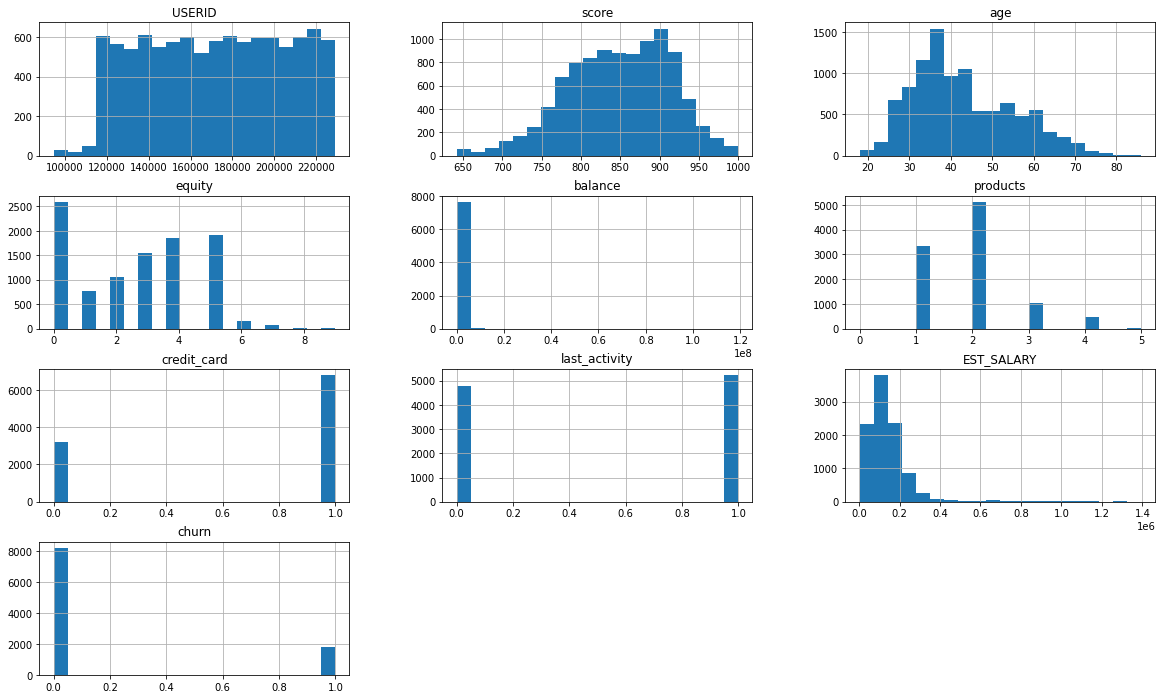

In [6]:
df.hist(figsize=(20, 12), bins=20)

# Вывод:
- Пропуски содержатся в столбцах age и balance
- Необходимо привести данные к корректному офрормлению
- Особых проблем с типами данных нет

# Шаг 2. Предобработка данных

In [7]:
df.columns = df.columns.str.lower() # приводим к нижнему регистру

In [8]:
df = df.rename(columns = {'userid': 'user_id'})# userid приведем к змеиному регистру 

проверка данных на дубликаты и анализ их природы

In [9]:
# проверим есть ли явные дубликаты
df.duplicated().sum()

0

In [10]:
# проверим есть ли дубликаты среди пользователей
df['user_id'].duplicated().sum()

73

In [11]:
df.duplicated(subset=['user_id', 'city']).sum() # нет дубликатов среди пользователей и городов

0

In [12]:
df[df.duplicated(subset = ['user_id'], keep=False)].sort_values(by='user_id').head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


Можно заметить, что у некоторых клиентов user_id совпадает, но город и остальные данные нет. Это относится только к клиентам Рыбинска и Ярославля. Скорее всего, это ошибка баз данных этих город, поэтому будет неверно удалять эти данные.

проверка данных на пропуски и анализ их природы

In [13]:
# количество пропусков 
df.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [14]:
df[df['age'].isna()].head(26) # количество пропусков в столбце age

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


Незначительное количество пропусков возможно связанно с тем, что клиенты банка забыли заполнить это поле.

In [15]:
df['balance_isnull'] = df['balance'].isnull()

In [16]:
# True - отсутствие баланса, False - наличие баланса
df['balance_isnull'].value_counts()

False    7705
True     2295
Name: balance_isnull, dtype: int64

Пропуски в балансе имеют практически 25% от всех записей.

In [17]:
df.groupby('balance_isnull')['city'].value_counts(normalize=True).round(2)

balance_isnull  city     
False           Ярославль    0.57
                Рыбинск      0.27
                Ростов       0.15
True            Ярославль    0.64
                Рыбинск      0.26
                Ростов       0.10
Name: city, dtype: float64

Больше всего пропусков в Ярославле. Стоит проверить, связаны пропуски с тем, что клиент ушел или нет.

In [18]:
# 0 - клиент остался в банке, 1 - клиент ушел из банка
df.groupby(['balance_isnull'])['churn'].value_counts(normalize=True).round(2)

balance_isnull  churn
False           0        0.77
                1        0.23
True            0        0.99
                1        0.01
Name: churn, dtype: float64

У 99% клиентов, которые остались отсутствует запись о балансе. При этом же у 77 % клиентов, которые остались есть запись о балансе. Разница в 22% довольно большая разница, но не колосальная, как могло показаться на первый взгляд.

In [19]:
df.groupby('balance_isnull')['products'].value_counts(normalize=True).round(2)

balance_isnull  products
False           2           0.62
                1           0.18
                3           0.13
                4           0.06
                5           0.00
True            1           0.85
                2           0.14
                3           0.01
                0           0.00
Name: products, dtype: float64

Довольно много пропусков у клиентов с 1 товаром.

In [20]:
df.groupby('balance_isnull')['gender'].value_counts(normalize=True).round(2)

balance_isnull  gender
False           Ж         0.52
                М         0.48
True            М         0.56
                Ж         0.44
Name: gender, dtype: float64

In [21]:
df.groupby('balance_isnull')['equity'].value_counts(normalize=True).round(2) 

balance_isnull  equity
False           5         0.25
                4         0.24
                3         0.20
                2         0.14
                1         0.09
                0         0.05
                6         0.02
                7         0.01
                8         0.00
                9         0.00
True            0         0.95
                1         0.05
                3         0.00
Name: equity, dtype: float64

У клиентов с 0 баллов собственности очень много пропусков.

In [22]:
# 0 - у клиента не кредитной карты, 1 - у клиент есть кредитная карта
df.groupby('balance_isnull')['credit_card'].value_counts(normalize=True).round(2)

balance_isnull  credit_card
False           1              0.64
                0              0.36
True            1              0.82
                0              0.18
Name: credit_card, dtype: float64

У клиентов, которых отсутствовал баланс, 82% пользовались кредитной картой.

In [23]:
# # 0 - клиент неактивен, 1 - клиент активен
df.groupby('balance_isnull')['last_activity'].value_counts(normalize=True).round(2)

balance_isnull  last_activity
False           1                0.52
                0                0.48
True            1                0.55
                0                0.45
Name: last_activity, dtype: float64

- Пропуски в балансе имеют практически 25% от всех записей
- Больше всего пропусков в Ярославле. Стоит проверить, связаны пропуски с тем, что клиент ушел или нет
- У 99% клиентов, которые остались отсутствует запись о балансе. При этом же у 77 % клиентов, которые остались есть запись о балансе. Разница в 22% довольно большая разница, но не колосальная, как могло показаться на первый взгляд
- Довольно много пропусков у клиентов с 1 товаром
- У клиентов с 0 баллов собственности очень много пропусков
- У клиентов, которых отсутствовал баланс, 82% пользовались кредитной картой

Проверим можно ли заполнить этот столбец нулями, заполнять средним или медианой нет смысла

In [24]:
df.query('balance == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_isnull
3900,179831,730.0,Ярославль,М,18.0,0,0.0,2,1,1,64548.33,0,False
6757,148456,813.0,Ярославль,М,20.0,2,0.0,2,1,0,23876.51,0,False


Только у двух клиентов нулевой баланс, можно сделать вывод, что нулевой баланс редкость для клинтов банка, поэтому лучше оставить пропуски как есть.

проверка типов данных столбцов таблицы на корректность

In [25]:
df.dtypes

user_id             int64
score             float64
city               object
gender             object
age               float64
equity              int64
balance           float64
products            int64
credit_card         int64
last_activity       int64
est_salary        float64
churn               int64
balance_isnull       bool
dtype: object

In [26]:
df.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_isnull
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,False
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,False
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,True
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,False
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,False
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0,False
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0,False
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0,False
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0,False
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0,True


Столбцам user_id, city, gender, equity, balance, products, credit_card, last_activity, est_salary, churn нет смысла менять, тип данных, они уже приведины к необходимым значениям. Были сомнения касательно столбцов score и age, но их лучше оставить в float64, потому что перевод к int64 может привести к потери части данных.

проверка данных на аномалии и выбросы

In [27]:
df.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Есть странности относительно минимальных значений в столбцах est_salary и products.

In [28]:
df[df['est_salary'] < 10000]['user_id'].count()

19

19 клиентов с зарплатами меньше 10 тыс, возможно это связано с неверной оценкой зарплаты клиентов банком.

In [29]:
df[df['products'] == 0] # проверим минимальное значение столбца products

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_isnull
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1,True


In [30]:
df = df[df['products'] > 0] # одна запись, скорее всего это выброс его можно удалить

кодирование категориальных переменных

In [31]:
# Применим метод get_dummies
df_copy = df.copy()
df = pd.get_dummies(df, dummy_na = False, columns = ['gender', 'city'])
df['city'] = df_copy['city'] 
df['gender'] = df_copy['gender'] 

df.head(10)

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_isnull,gender_Ж,gender_М,city_Ростов,city_Рыбинск,city_Ярославль,city,gender
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,False,1,0,0,1,0,Рыбинск,Ж
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,False,1,0,0,1,0,Рыбинск,Ж
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,True,1,0,0,1,0,Рыбинск,Ж
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,False,1,0,0,0,1,Ярославль,Ж
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,False,0,1,0,0,1,Ярославль,М
5,202305,856.0,56.0,4,863687.24,3,1,0,156619.80,0,False,0,1,0,1,0,Рыбинск,М
6,177259,807.0,39.0,3,405042.44,3,0,1,103838.32,0,False,1,0,0,0,1,Ярославль,Ж
7,218868,825.0,38.0,4,458145.40,2,1,1,68085.48,0,False,1,0,0,0,1,Ярославль,Ж
8,211686,923.0,54.0,5,1206337.87,2,1,0,155371.79,0,False,0,1,0,0,1,Ярославль,М
9,133130,906.0,67.0,0,NaN,1,0,1,238055.53,0,True,1,0,0,0,1,Ярославль,Ж


In [32]:
# переименуем столбцы
df = df.rename (
    columns = ({
        'city_Ростов':'Ростов', 
        'city_Рыбинск':'Рыбинск',
        'city_Ярославль':'Ярославль', 
        'gender_Ж':'Женщина', 
        'gender_М':'Мужчина'}))
df.head(10)

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_isnull,Женщина,Мужчина,Ростов,Рыбинск,Ярославль,city,gender
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,False,1,0,0,1,0,Рыбинск,Ж
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,False,1,0,0,1,0,Рыбинск,Ж
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,True,1,0,0,1,0,Рыбинск,Ж
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,False,1,0,0,0,1,Ярославль,Ж
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,False,0,1,0,0,1,Ярославль,М
5,202305,856.0,56.0,4,863687.24,3,1,0,156619.80,0,False,0,1,0,1,0,Рыбинск,М
6,177259,807.0,39.0,3,405042.44,3,0,1,103838.32,0,False,1,0,0,0,1,Ярославль,Ж
7,218868,825.0,38.0,4,458145.40,2,1,1,68085.48,0,False,1,0,0,0,1,Ярославль,Ж
8,211686,923.0,54.0,5,1206337.87,2,1,0,155371.79,0,False,0,1,0,0,1,Ярославль,М
9,133130,906.0,67.0,0,NaN,1,0,1,238055.53,0,True,1,0,0,0,1,Ярославль,Ж


# Вывод:
- Была выполнена проверка датасета на дуликаты и пропуски, и анализ их природы
- В изменении типов данных не было необходимости
- Была выполнена проверка на аномалии и выбросы
- Было выполнено кодирование категориальных переменных

# Шаг 3. Исследовательский анализ данных

общее распределение признаков клиентов банка

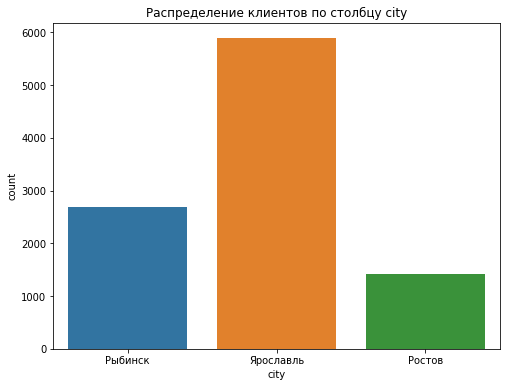

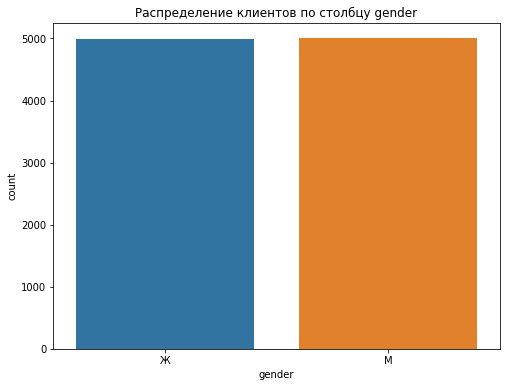

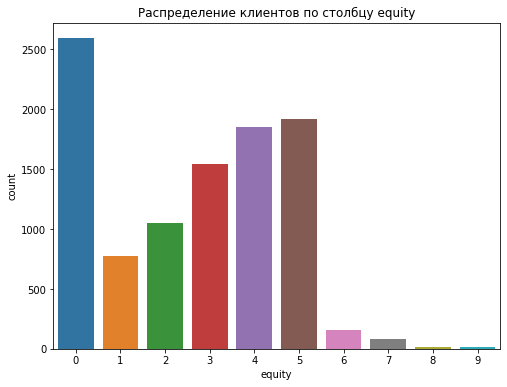

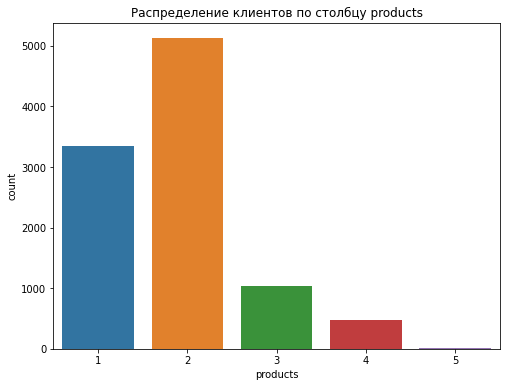

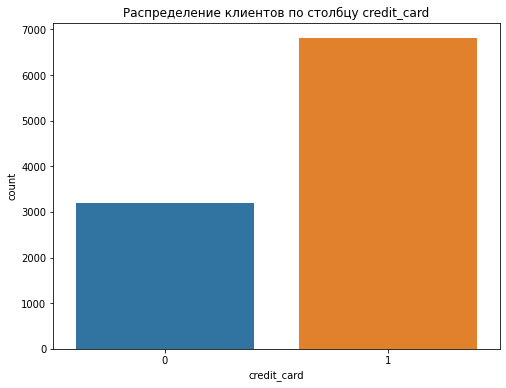

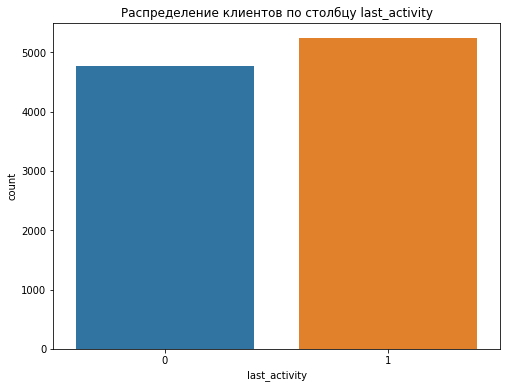

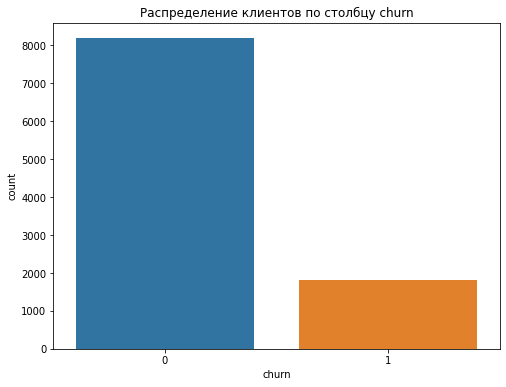

In [33]:
for column in ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity', 'churn']:
        plt.figure(figsize= (8,6))
        ax = sns.countplot(data = df, x = column, hue = None)
        plt.title(f'Распределение клиентов по столбцу {column}')
        plt.show()

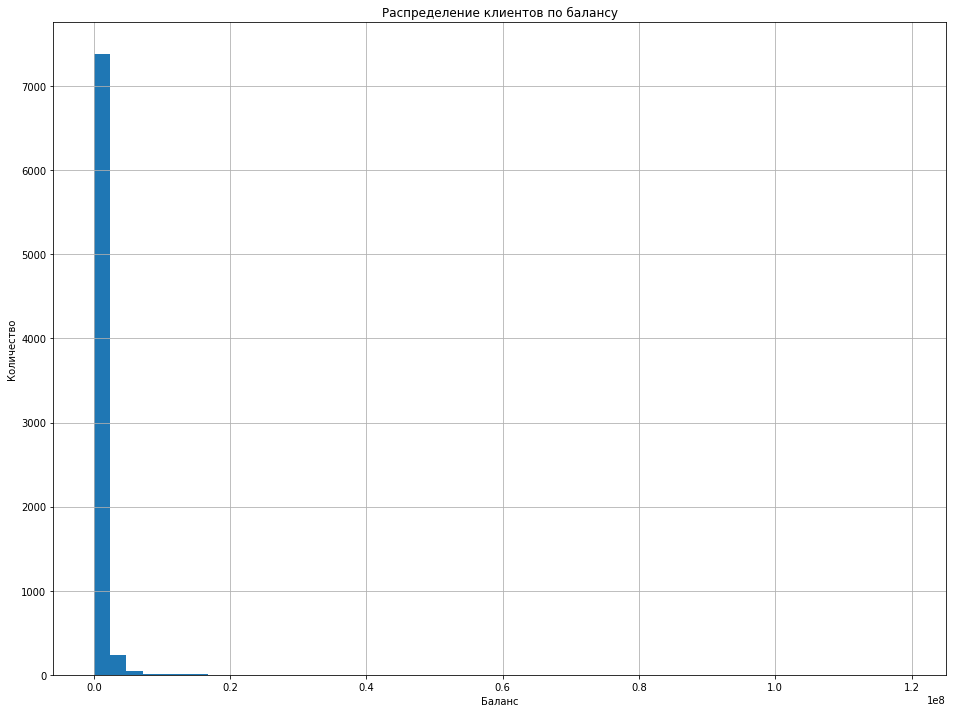

In [34]:
plt.figure(figsize=(16,12))

df['balance'].hist(bins=50)

plt.title('Распределение клиентов по балансу')
plt.xlabel('Баланс')
plt.ylabel('Количество')
plt.show()

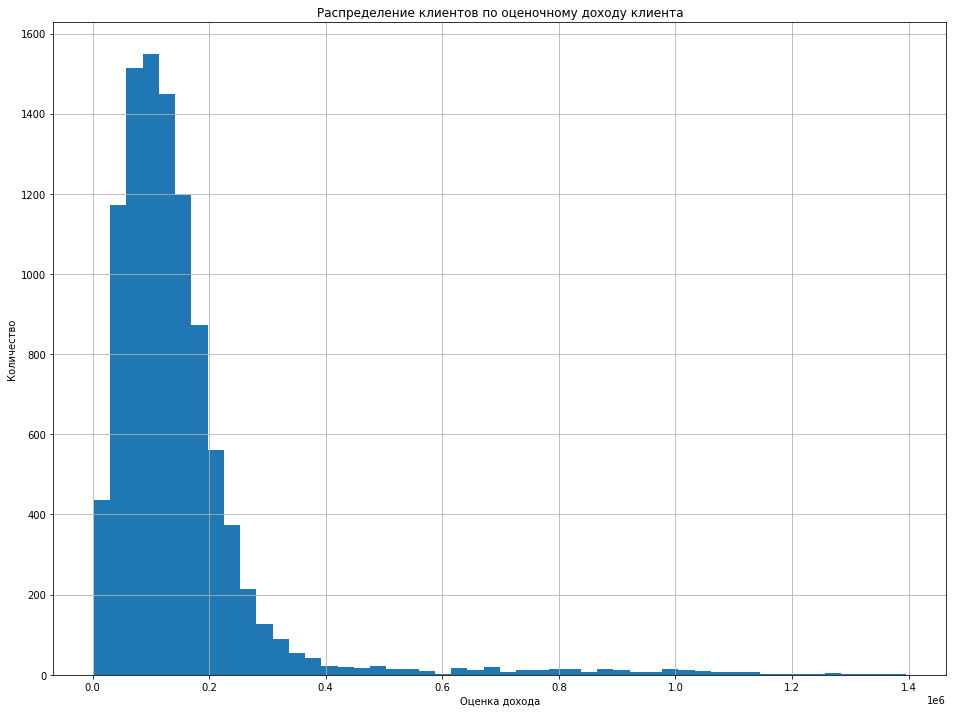

In [35]:
plt.figure(figsize=(16,12))

df['est_salary'].hist(bins=50)

plt.title('Распределение клиентов по оценочному доходу клиента')
plt.xlabel('Оценка дохода')
plt.ylabel('Количество')
plt.show()

In [36]:
df[df['est_salary'] < 10000]['user_id'].count()

19

In [37]:
df[df['balance'] < 10000]['user_id'].count()

54

На основе гистограмм зададим верхнию границу для столбцов balance и est_salary. Нижнию границу можно не задавать из-за небольшого числа выбросов.

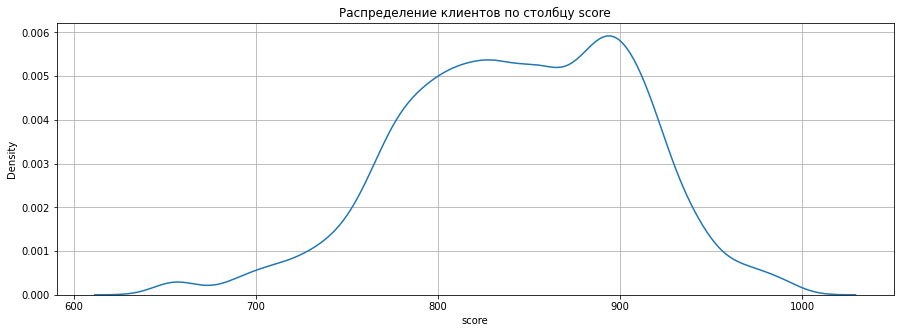

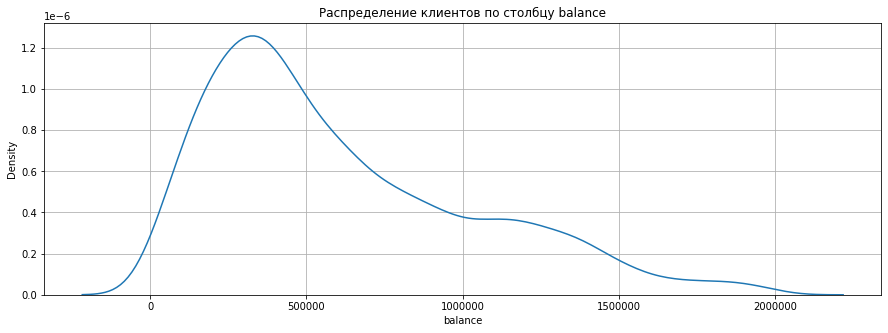

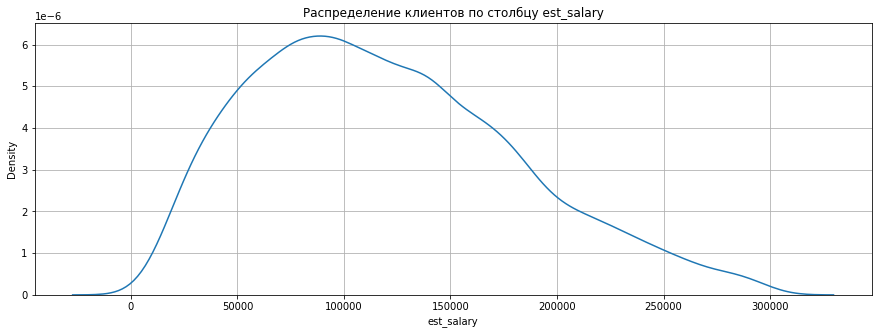

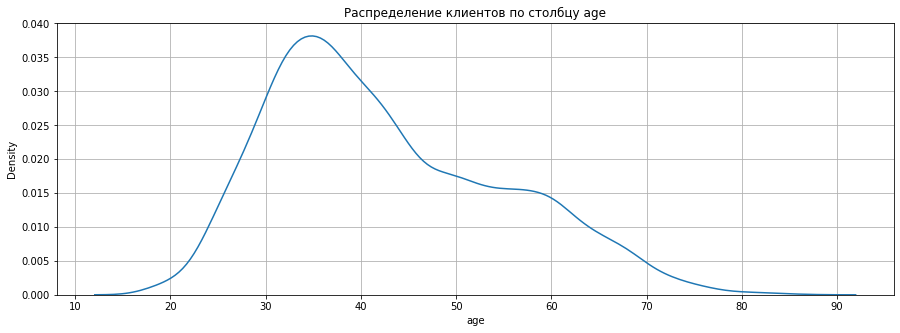

In [38]:
for column in ['score',  'balance', 'est_salary', 'age']:
        plt.figure(figsize=(15,5))
        sns.kdeplot(data = df.query('(balance < 2000000 or balance != balance) & est_salary < 300000'), x = column, hue = None, common_norm = False)
        plt.title(f'Распределение клиентов по столбцу {column}')
        plt.grid(True)
        plt.ticklabel_format(style='plain', axis='x')
        plt.show()

- Клиентов филиала Ярославля больше чем у филиалов Рыбинска и Ростова вместе взятых 
- Женщин и мужчин практически поровну
- Взрослые и люди среднего возраста являются основными клиентами банка
- Большинство клиентов имеют 0 баллов собственности, но и довольно много клиентов имеют от 1 до 5 баллов собственности
- Больше всего клиентов пользуются одним или двумя продуктами
- Около 2/3 клиентов пользуется кредитной картой
- Столбец last_activity имеет практические равные значения между активными и неактивными клиентами
- Доля оттока около 20%
- Большая часть клиентов имеет рейтинг кредитного скролинга в райноне от 700 до 900 баллов
- По столбцам balance и est_salary можно увидеть большую разницу в балансе и зарплате клиентов банка.

Исследование оттока клиентов в разрезе значений признаков

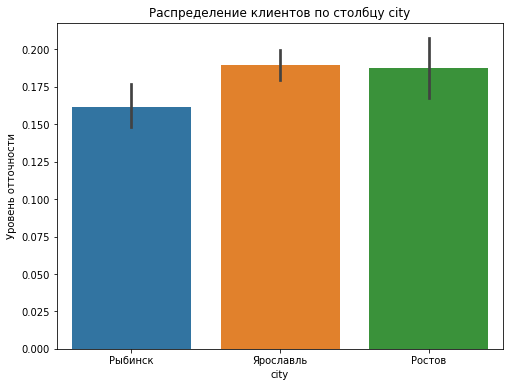

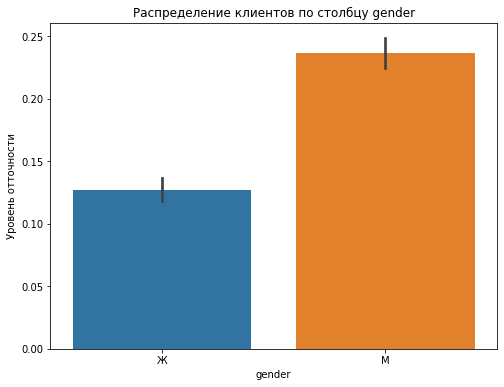

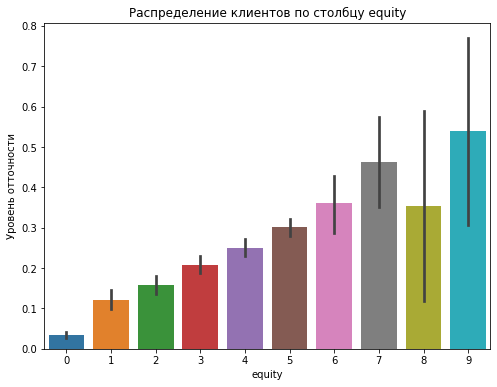

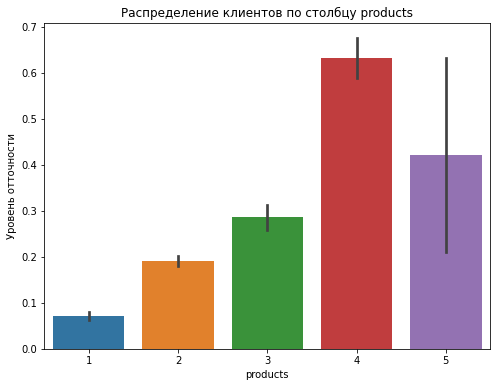

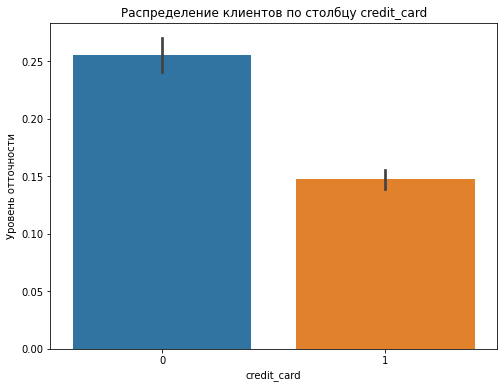

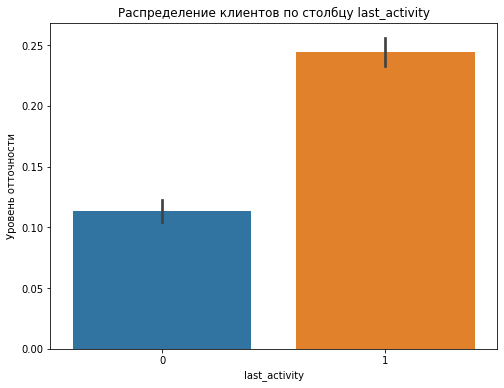

In [39]:
for column in ['city', 'gender','equity', 'products', 'credit_card', 'last_activity']:
        plt.figure(figsize= (8,6))
        ax = sns.barplot(data = df, x = column, y = 'churn')
        plt.ylabel('Уровень отточности')
        plt.title(f'Распределение клиентов по столбцу {column}')
        plt.show()

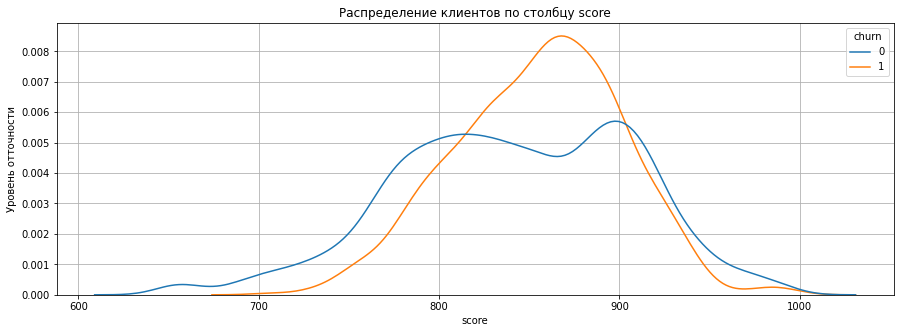

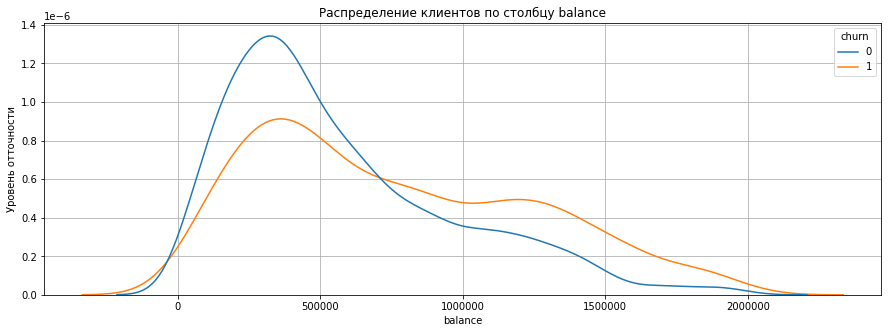

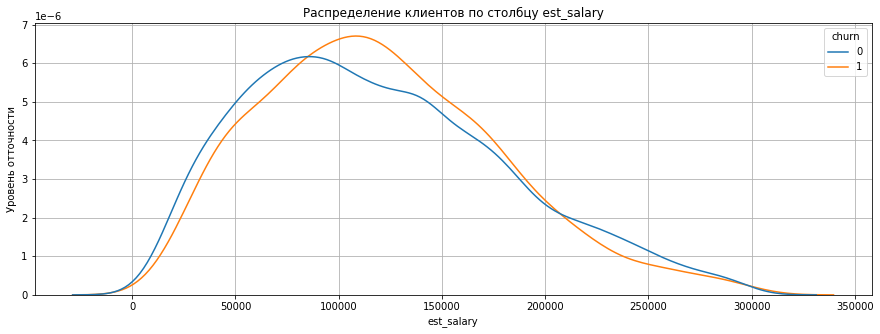

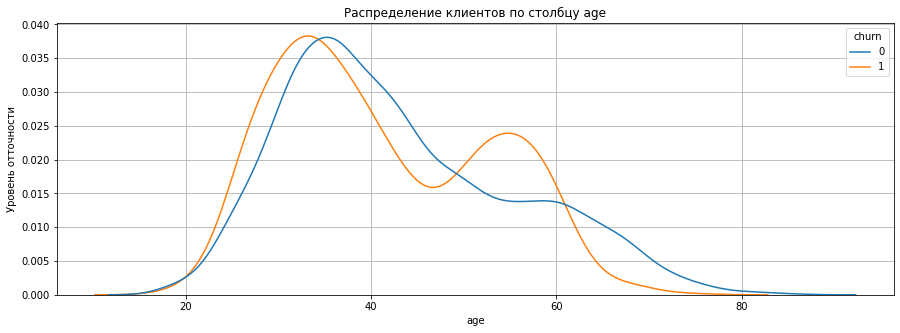

In [40]:
for column in ['score',  'balance', 'est_salary', 'age']:
        plt.figure(figsize=(15,5))
        sns.kdeplot(data = df.query('(balance < 2000000 or balance != balance) & est_salary < 300000'), x = column, hue = 'churn', common_norm = False)
        plt.title(f'Распределение клиентов по столбцу {column}')
        plt.ylabel('Уровень отточности')
        plt.grid(True)
        plt.ticklabel_format(style='plain', axis='x')
        plt.show()

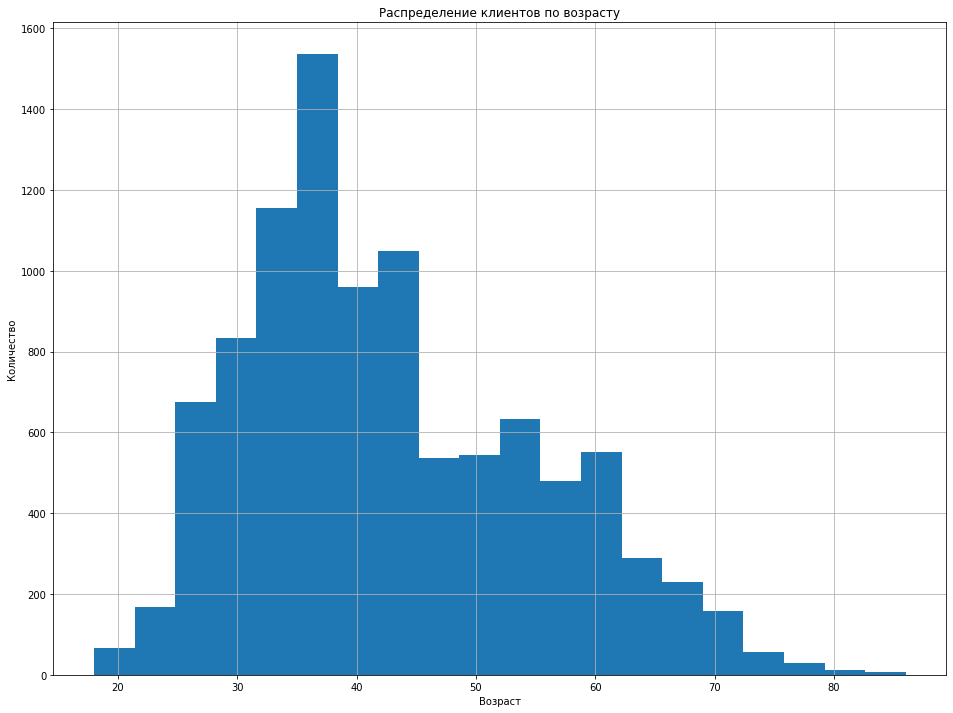

In [41]:
# рассмотрим возраст клиентов
plt.figure(figsize=(16,12))

df['age'].hist(bins=20)

plt.title('Распределение клиентов по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>What can be improve-⚠️</b><br> По дефолту bins=10 - почти всегда это очень грубо, попробуй другие значения, чтобы график выглядел детализированно, но еще не специфично</div> <br>

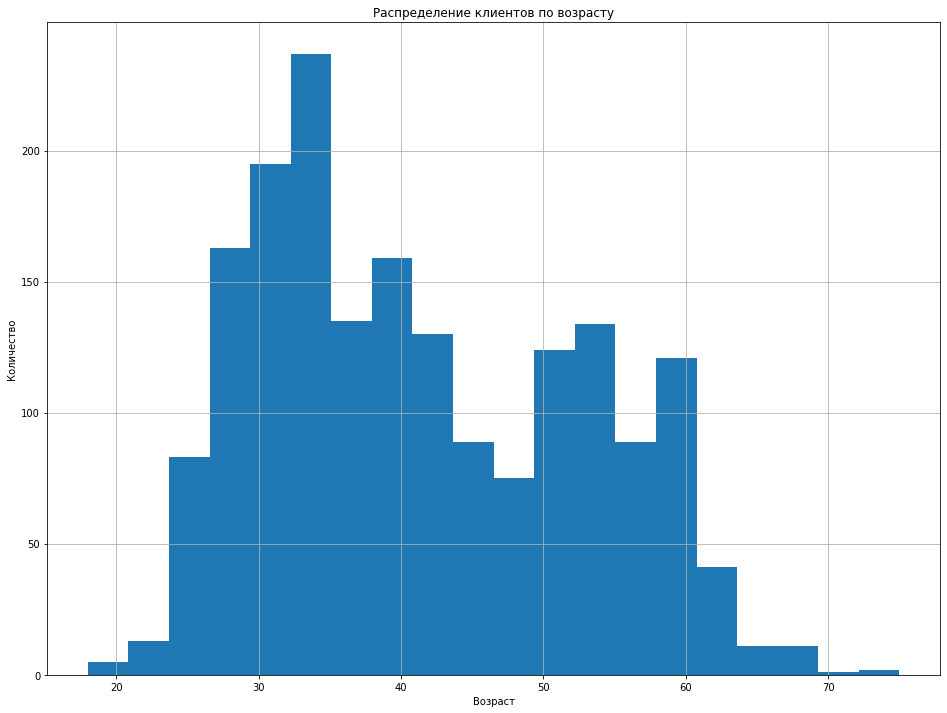

In [42]:
# рассмотрим возраст клиентов в разрезе оттока
df_hist = df[df['churn'] == 1]['age']

plt.figure(figsize=(16,12))

df_hist.hist(bins=20)

plt.title('Распределение клиентов по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

In [43]:
# разобьем клиентов на группы по возрасту на основании гистограммы в разрезе оттока
def age_group(age):
    if age <= 23:
        return 'молодые взрослые' 
    elif 23 <= age <= 35:
        return 'взрослые'
    elif 36 <= age <= 49:
        return 'средний возраст'
    elif 50 <= age <= 63:
        return 'пожилые'
    else:
        return 'пенсионный возраст'

In [44]:
df['age_group'] = df['age'].apply(age_group)

In [45]:
df['age_group'].value_counts()

средний возраст       3882
взрослые              3144
пожилые               2127
пенсионный возраст     699
молодые взрослые       147
Name: age_group, dtype: int64

- Мужчины чаще чем женщины покидают банк
- Пожилые люди редко покидают банк
- Активные клиенты реже уходят из банка
- Клиенты, у которых кредитный рейтинг находится в районе от 830 до 950 часто уходят из банка
- Клиенты с большим балансом чаще уходят из банка, при этом же клинты с балансом до 700000 гораздо чаще остаются
- У отточных клиентов зарплата выше чем у тех, что остались
- Клиенты в возрасте от 49 до 61 больше других подверженны оттоку

Остальные признаки слабо влияют на уход клиентов из банка

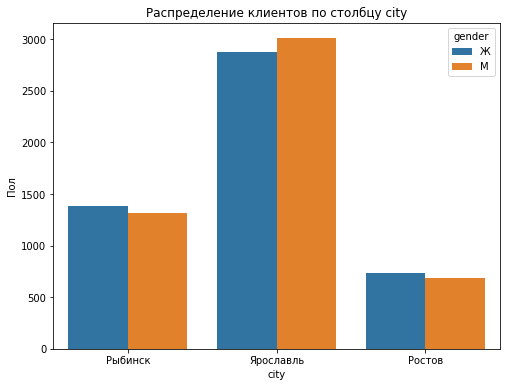

In [46]:
for column in ['city']:
        plt.figure(figsize= (8,6))
        ax = sns.countplot(data = df, x = column, hue = 'gender')
        plt.ylabel('Пол')
        plt.title(f'Распределение клиентов по столбцу {column}')
        plt.show()

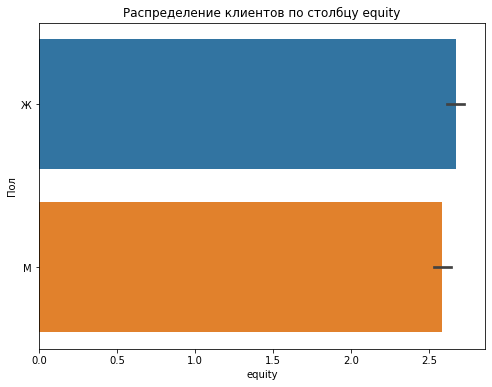

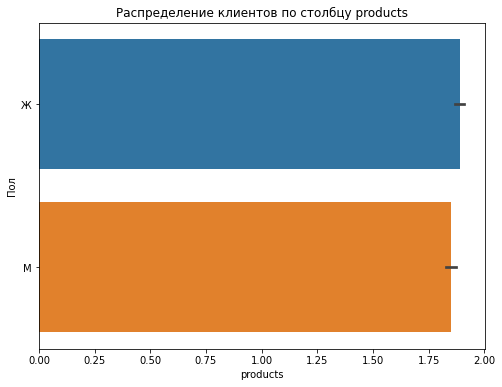

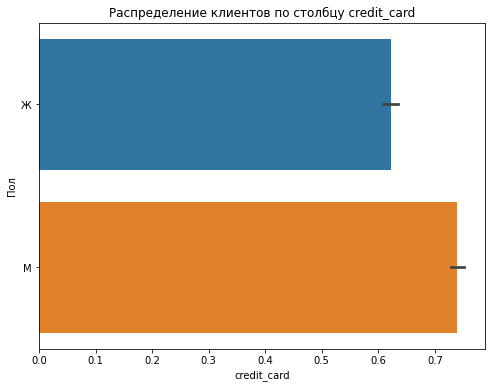

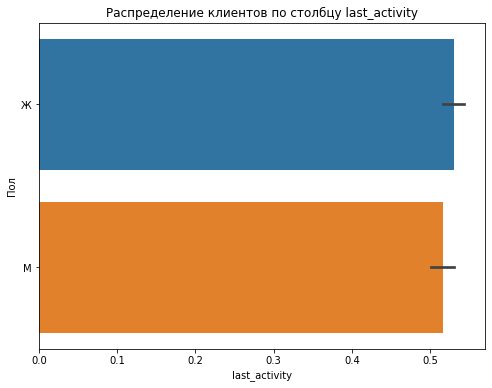

In [47]:
for column in ['equity', 'products', 'credit_card', 'last_activity']:
        plt.figure(figsize= (8,6))
        ax = sns.barplot(data = df, x = column, y = 'gender')
        plt.ylabel('Пол')
        plt.title(f'Распределение клиентов по столбцу {column}')
        plt.show()

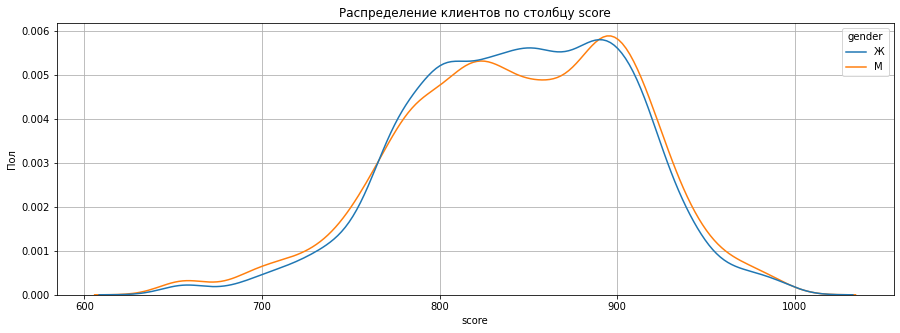

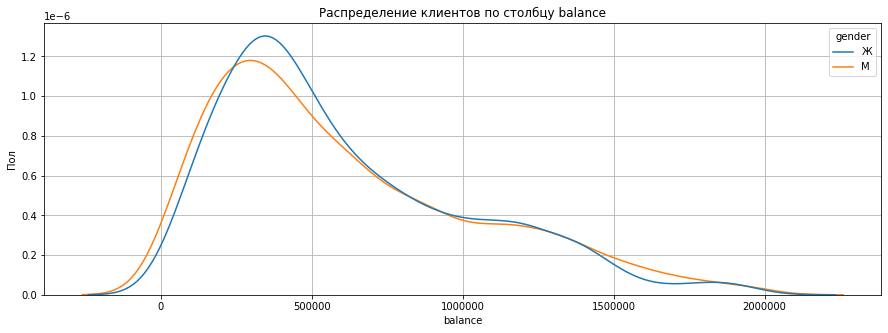

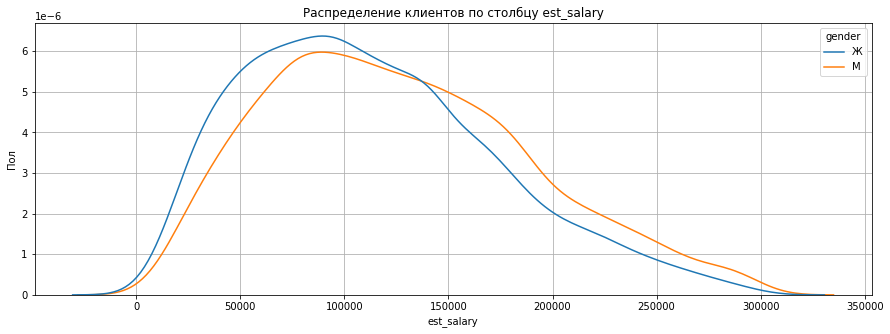

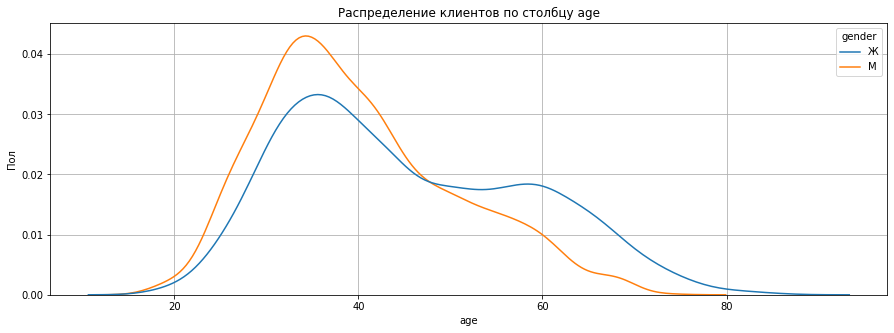

In [48]:
for column in ['score',  'balance', 'est_salary', 'age']:
        plt.figure(figsize=(15,5))
        sns.kdeplot(data = df.query('(balance < 2000000 or balance != balance) & est_salary < 300000'), x = column, hue = 'gender', common_norm = False)
        plt.title(f'Распределение клиентов по столбцу {column}')
        plt.ylabel('Пол')
        plt.grid(True)
        plt.ticklabel_format(style='plain', axis='x')
        plt.show()

- В целом распределение мужчин и женщин среди клиентов банка практические равное
- Среди взрослых клиентов банка больше мужчин, а среди пожилой группы клиентов гораздо больше женщин
- Женщины чаще чем мужчины предпочитают оставаться в банке

Остальные признаки слабо влияют на уход клиентов из банка

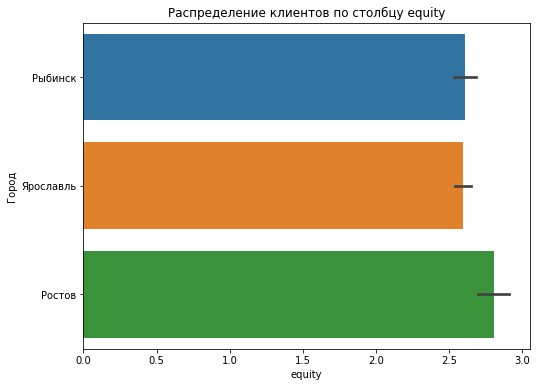

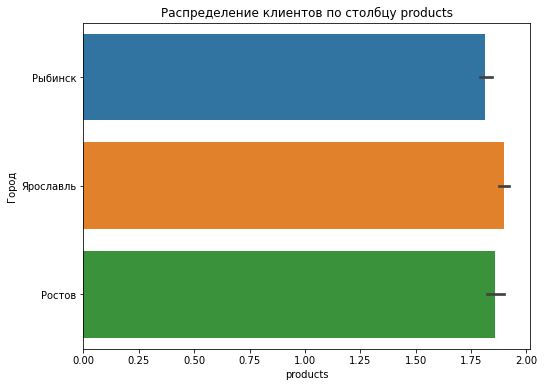

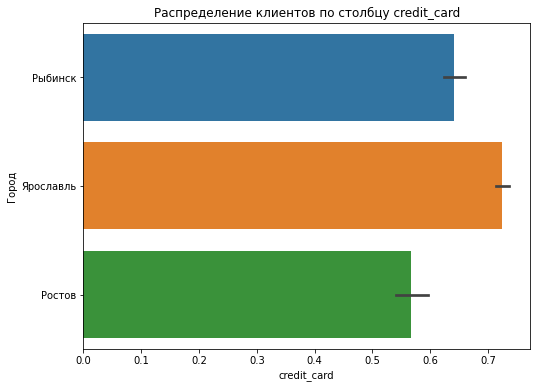

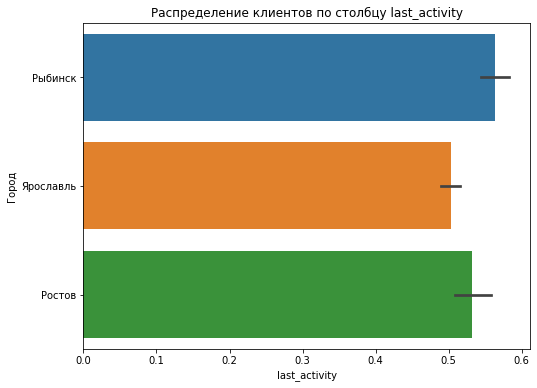

In [49]:
for column in ['equity', 'products', 'credit_card', 'last_activity']:
        plt.figure(figsize= (8,6))
        ax = sns.barplot(data = df, x = column, y = 'city')
        plt.ylabel('Город')
        plt.title(f'Распределение клиентов по столбцу {column}')
        plt.show()

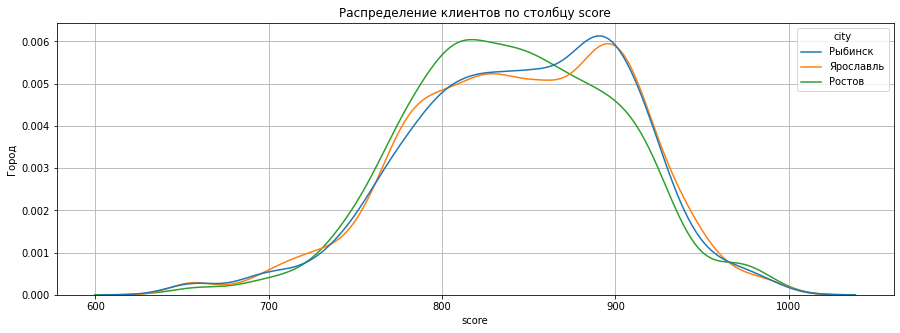

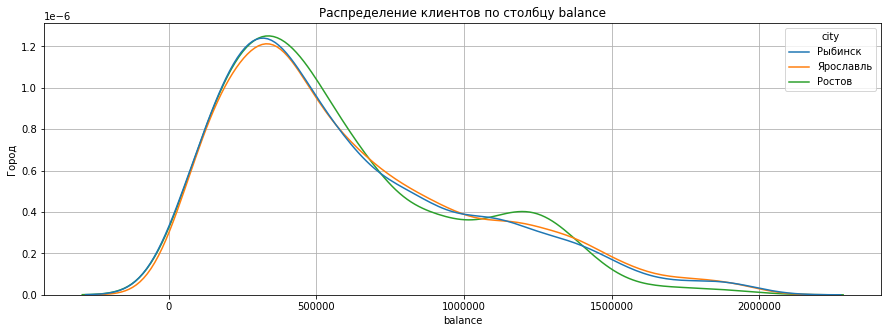

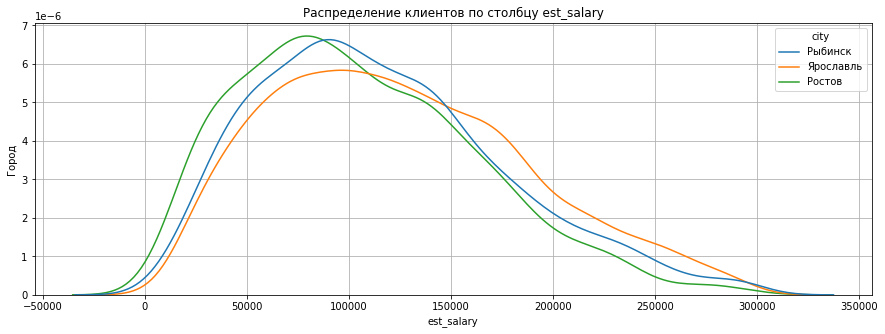

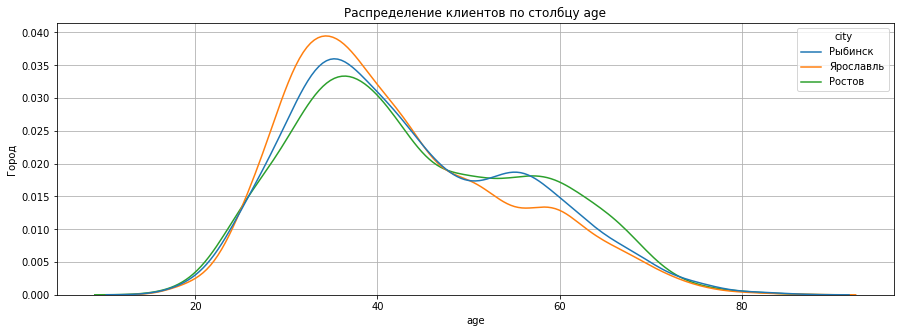

In [50]:
for column in ['score',  'balance', 'est_salary', 'age']:
        plt.figure(figsize=(15,5))
        sns.kdeplot(data = df.query('(balance < 2000000 or balance != balance) & est_salary < 300000'), x = column, hue = 'city', common_norm = False)
        plt.title(f'Распределение клиентов по столбцу {column}')
        plt.ylabel('Город')
        plt.grid(True)
        plt.ticklabel_format(style='plain', axis='x')
        plt.show()

Распределение признаков клиентов банков по городам в целом равное, что скорее свидетельствует, о том, что филиалы банка одинаково хорошо работают.

определение портретов клиентов и их сравнение

In [51]:
equity_churn = df.pivot_table(index=['churn'], 
                              values = ['score',
                               'age',
                               'est_salary', 
                               'city',
                                'gender', 
                               'balance'], aggfunc = ['mean']).rename(
columns={'score':'Средний балл скоринга',
         'age':'Средний возраст',
         'balance':'Средний баланс',
         'est_salary':'Средняя запрлата',
         'mean':'Среднее'})

equity_churn

Среднее                                                      
      Средний возраст Средний баланс Средняя запрлата Средний балл скоринга
churn                                                                      
0           43.020846   7.339826e+05    147783.200108            845.428362
1           41.429593   1.133993e+06    148310.728202            863.346894

In [52]:
equity_churn = df.pivot_table(index=['churn'], 
                              values = [ 
                               'equity',
                               'est_salary',
                               'products',
                               'gender', 
                               'balance'], aggfunc = ['median']).rename(
columns={'equity':'Медианное распредление баллов собственности',
         'products':'Медианное распределение продуктов',
         'balance':'Медианный баланс',
         'est_salary':'Медианная запрлата',
         'median':'Медиана'})
equity_churn

Медиана                                              \
      Медианный баланс Медианное распредление баллов собственности   
churn                                                                
0           475382.445                                           3   
1           782410.470                                           4   

                                                            
      Медианная запрлата Медианное распределение продуктов  
churn                                                       
0             118257.715                                 2  
1             125395.220                                 2

Между средними отточными и неотточными клиентами видна значимая разница по следующим характеристикам: количество баллов собственности, баланс счёта, возраст. По остальным характеристикам отточность клиентов проявляется слабо.

Корреляционный анализ

In [53]:
#вычисляем матрицу корреляций
corr_matrix = df.corr()
corr_matrix

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_isnull,Женщина,Мужчина,Ростов,Рыбинск,Ярославль
user_id,1.000000,0.009929,0.018016,0.004612,0.006133,-0.004673,0.005571,-0.031106,-0.000431,-0.011780,0.004256,-0.030597,0.030597,-0.033687,0.014735,0.010591
score,0.009929,1.000000,-0.012339,0.064103,0.235812,-0.003708,-0.094503,-0.031004,0.164049,0.105634,0.138598,-0.012429,0.012429,-0.037572,-0.000609,0.027180
age,0.018016,-0.012339,1.000000,0.020581,0.069745,0.017900,-0.122761,-0.007849,-0.039354,-0.050463,-0.029226,0.212628,-0.212628,0.047128,0.028978,-0.059549
equity,0.004612,0.064103,0.020581,1.000000,0.164126,0.432235,-0.167497,-0.001950,-0.171965,0.270581,-0.710106,0.021604,-0.021604,0.036300,-0.005651,-0.020634
balance,0.006133,0.235812,0.069745,0.164126,1.000000,0.075684,-0.059253,0.025004,0.339622,0.085577,NaN,-0.051711,0.051711,-0.035805,-0.034697,0.057342
products,-0.004673,-0.003708,0.017900,0.432235,0.075684,1.000000,-0.251831,0.036905,-0.118299,0.301616,-0.487297,0.022916,-0.022916,-0.006223,-0.042259,0.042515
credit_card,0.005571,-0.094503,-0.122761,-0.167497,-0.059253,-0.251831,1.000000,-0.033603,0.035432,-0.130524,0.158645,-0.126223,0.126223,-0.098534,-0.049880,0.114816
last_activity,-0.031106,-0.031004,-0.007849,-0.001950,0.025004,0.036905,-0.033603,1.000000,0.002947,0.169037,0.028561,0.013768,-0.013768,0.006962,0.048993,-0.049111
est_salary,-0.000431,0.164049,-0.039354,-0.171965,0.339622,-0.118299,0.035432,0.002947,1.000000,0.001460,0.307379,-0.082295,0.082295,-0.106101,-0.057300,0.126870
churn,-0.011780,0.105634,-0.050463,0.270581,0.085577,0.301616,-0.130524,0.169037,0.001460,1.000000,-0.249907,-0.141287,0.141287,0.006112,-0.031605,0.024165


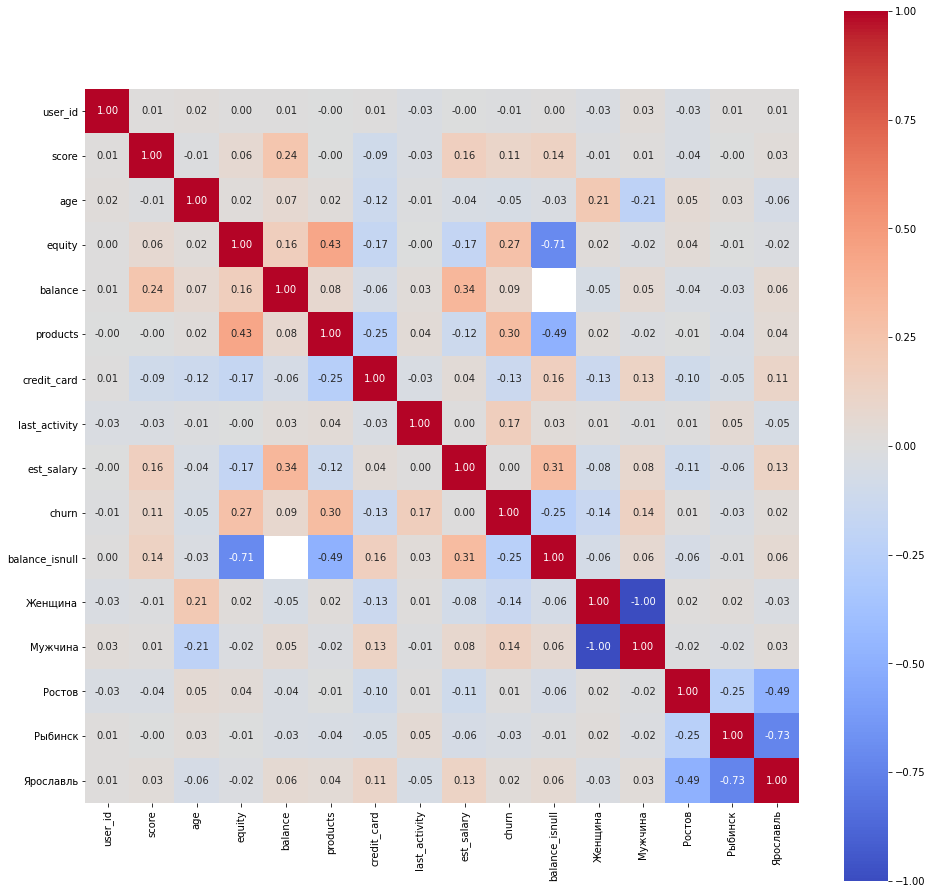

In [54]:
#график матрицы корреляций 
plt.figure(figsize=(16,16))
sns.heatmap(corr_matrix, annot=True, square=True, fmt = '.2f', cmap = 'coolwarm',)

plt.show()

- У столбца score слабая корреляция (0.11) с оттоком клиентов
- Возраст практически не влияет на отток клиентов
- Количество баллов собственности имеют слабую корреляцию (0.27) с оттоком
- Балланс на счете практически не влияет на отток клиентов
- Количество товаров у клиентов имеет среднию корреляцию (0.3) 
- Наличие кредитной карты у клиентов имеет отрицательную корреляцию
- Активность клиента имеет слабую корреляцию (0.17) с оттоком
- Зарплата не влияет на отток клиентов

# Вывод:
Общее распределение признаков клиентов банка

- Клиентов филиала Ярославля больше чем у филиалов Рыбинска и Ростова вместе взятых 
- Женщин и мужчин практически поровну
- Взрослые и люди среднего возраста являются основными клиентами банка
- Большинство клиентов имеют 0 баллов собственности, но и довольно много клиентов имеют от 1 до 5 баллов собственности
- Больше всего клиентов пользуются одним или двумя продуктами
- Около 2/3 клиентов пользуется кредитной картой
- Столбец last_activity имеет практические равные значения между активными и неактивными клиентами
- Доля оттока около 20%
- Большая часть клиентов имеет рейтинг кредитного скролинга в райноне от 700 до 900 баллов
- По столбцам balance и est_salary можно увидеть большую разницу в балансе и зарплате клиентов банка.

- Мужчины чаще чем женщины покидают банк
- Пожилые люди редко покидают банк
- Активные клиенты реже уходят из банка

Исследование оттока клиентов в разрезе значений признаков

- Мужчины чаще чем женщины покидают банк
- Пожилые люди редко покидают банк
- Активные клиенты реже уходят из банка
- В целом распределение мужчин и женщин среди клиентов банка практические равное
- Среди взрослых клиентов банка больше мужчин, а среди пожилой группы клиентов гораздо больше женщин
- Женщины чаще чем мужчины предпочитают оставаться в банке
- Распределение признаков клиентов банков по городам в целом равное, что скорее свидетельствует, о том, что филиалы банка одинаково хорошо работают.

Определение портретов клиентов и их сравнение

Между средними отточными и неотточными клиентами видна значимая разница по следующим характеристикам: количество баллов собственности, баланс счёта, возраст. По остальным характеристикам отточность клиентов проявляется слабо.

Корреляционный анализ

- У столбца score слабая корреляция (0.11) с оттоком клиентов
- Возраст практически не влияет на отток клиентов
- Количество баллов собственности имеют слабую корреляцию (0.27) с оттоком
- Баланс на счете практически не влияет на отток клиентов
- Количество товаров у клиентов имеет среднию корреляцию (0.3) 
- Наличие кредитной карты у клиентов имеет отрицательную корреляцию
- Активность клиента имеет слабую корреляцию (0.17) с оттоком
- Зарплата не влияет на отток клиентов

# Шаг 4. Проверка статистических гипотез

Формулирование гипотез

Гипотеза о разнице в возрасте клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Гипотеза о разнице в возрасте между оставшимися и отточными клиентами.

выбор и обоснование выбора статтеста

Для применения ttest мы должны быть уверены, что выборочные средние должны быть нормально распределены, но из ЦПТ мы знает, что выборочное распределение выборочного среднего близко к нормальному практически для любой генеральной совокупности, поэтому этот критерий подходит для ttest. Кроме того, так как дисперсии скорее всего не равны, то мы будем проверять гипотезы используя t-критерий Стьюдента с указанием equal_var = False и nan_policy = omit, чтобы игнорировать пропуски. На основе выше перечисленных обоснований, мы можем воспользоваться ttest.

проверка гипотез и интерпретация результата

Н0 : возраст клиентов которые пользуется одним продуктом и теми, которые пользуется двумя продуктами, не отличается.

Н1 : возраст клиентов которые пользуется одним продуктом и теми, которые пользуется двумя продуктами, отличается.

In [55]:
alpha = 0.05

results = st.ttest_ind(
    df[df['products'] == 1]['age'], 
    df[df['products'] == 2]['age'], 
    equal_var= False, nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.03299080704232691
Отвергаем нулевую гипотезу


Получившееся значение ниже уровня заданного значения alpha, а это значит, что есть статистически значимые различия в возрасте клиентов, которые пользуются одним и двумя продуктами

H0: возраст оставшихся и отточных клиентов не отличается.

H1: возраст оставшихся и отточных клиентов отличается.

In [56]:
alpha = 0.05

results = st.ttest_ind(
    df[df['churn'] == 1]['age'], 
    df[df['churn'] == 0]['age'], 
    equal_var= False, nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
    
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 7.536127357312234e-08
Отвергаем нулевую гипотезу


Возраст оставшихся и отточных клиентов отличается.

# Вывод:
- Гипотеза N1: Получившееся значение ниже уровня заданного значения alpha, а это значит, что есть статистически значимые различия в возрасте клиентов, которые пользуются одним и двумя продуктами
- Гипотеза №2: Возраст оставшихся и отточных клиентов отличается

# Шаг 5. Промежуточный вывод

Исходя из данных полученнных на основе проверки гипотез, исследовательского и корреляционного анализа будем проводить сегментацию клиентов. Особое внимание уделим количеству товаров у клиентов, потому что в ходе корреляционного анализа мы выяснили, что количество товаров у клиентов имеет среднию корреляцию с оттоком. Также неплохую корреляцию имеют баллы собственности клиентов и активный клиент или нет. Кроме того, в ходе исследовательского анализа данных мы выявели, что мужчины чаще покидают банк. В ходе проверки статистических гипотез мы, также выяснили, что возраст влияет на отток клиентов.

# Шаг 6. Сегментация клиентов

## Сегмент №1

In [57]:
segment1_count = len(df.query('gender == "М" and credit_card == 0 and score >= 830 and score <= 950'))

segment1_churn = len(df.query('gender == "М" and credit_card == 0 and score >= 830 and score <= 950 and churn == 1'))

print('Общее число клиентов в сегменте №1:',segment1_count)

print('Число отточных пользователей в сегменте №1:',segment1_churn )

print('Доля отточных пользователей в сегменте №1:', round((segment1_churn / segment1_count) * 100,2), "%")

Общее число клиентов в сегменте №1: 880
Число отточных пользователей в сегменте №1: 376
Доля отточных пользователей в сегменте №1: 42.73 %


## Сегмент №2

In [58]:
segment1_count = len(df.query('balance > 1000000 and products == 2 and age >= 49 and age <= 61'))

segment1_churn = len(df.query('balance > 1000000 and products == 2 and age >= 49 and age <= 61 and churn == 1'))

print('Общее число клиентов в сегменте №2:',segment1_count)

print('Число отточных пользователей в сегменте №2:',segment1_churn )

print('Доля отточных пользователей в сегменте №2:', round((segment1_churn / segment1_count) * 100,2), "%")

Общее число клиентов в сегменте №2: 304
Число отточных пользователей в сегменте №2: 114
Доля отточных пользователей в сегменте №2: 37.5 %


## Сегмент №3

In [59]:
segment1_count = len(df.query('last_activity == 1 and products >= 3  and equity < 5'))

segment1_churn = len(df.query('last_activity == 1 and products >= 3  and equity < 5 and churn == 1'))

print('Общее число клиентов в сегменте №3:',segment1_count)

print('Число отточных пользователей в сегменте №3:',segment1_churn )

print('Доля отточных пользователей в сегменте №3:', round((segment1_churn / segment1_count) * 100,2), "%")

Общее число клиентов в сегменте №3: 508
Число отточных пользователей в сегменте №3: 214
Доля отточных пользователей в сегменте №3: 42.13 %


# Вывод:
Отточный клиент это взрослый мужчина, который не проявляет активность, владее более чем одним продуктом и имеет неплохие баллы кредитного скролинга.

# Шаг 7. Выводы и рекомендации

# Предобработка данных
- Была выполнена проверка датасета на дуликаты и пропуски, и анализ их природы
- В изменении типов данных не было необходимости
- Была выполнена проверка на аномалии и выбросы
- Было выполнено кодирование категориальных переменных

# Исследовательский анализ данных
Общее распределение признаков клиентов банка

- Клиентов филиала Ярославля больше чем у филиалов Рыбинска и Ростова вместе взятых 
- Женщин и мужчин практически поровну
- Взрослые и люди среднего возраста являются основными клиентами банка
- Большинство клиентов имеют 0 баллов собственности, но и довольно много клиентов имеют от 1 до 5 баллов собственности
- Больше всего клиентов пользуются одним или двумя продуктами
- Около 2/3 клиентов пользуется кредитной картой
- Столбец last_activity имеет практические равные значения между активными и неактивными клиентами
- Доля оттока около 20%
- Большая часть клиентов имеет рейтинг кредитного скролинга в райноне от 700 до 900 баллов
- По столбцам balance и est_salary можно увидеть большую разницу в балансе и зарплате клиентов банка.

- Мужчины чаще чем женщины покидают банк
- Пожилые люди редко покидают банк
- Активные клиенты реже уходят из банка

Исследование оттока клиентов в разрезе значений признаков

- Мужчины чаще чем женщины покидают банк
- Пожилые люди редко покидают банк
- Активные клиенты реже уходят из банка
- В целом распределение мужчин и женщин среди клиентов банка практические равное
- Среди взрослых клиентов банка больше мужчин, а среди пожилой группы клиентов гораздо больше женщин
- Женщины чаще чем мужчины предпочитают оставаться в банке
- Распределение признаков клиентов банков по городам в целом равное, что скорее свидетельствует, о том, что филиалы банка одинаково хорошо работают.

Определение портретов клиентов и их сравнение

Между средними отточными и неотточными клиентами видна значимая разница по следующим характеристикам: количество баллов собственности, баланс счёта, возраст. По остальным характеристикам отточность клиентов проявляется слабо.

Корреляционный анализ

- У столбца score слабая корреляция (0.11) с оттоком клиентов
- Возраст практически не влияет на отток клиентов
- Количество баллов собственности имеют слабую корреляцию (0.27) с оттоком
- Баланс на счете практически не влияет на отток клиентов
- Количество товаров у клиентов имеет среднию корреляцию (0.3) 
- Наличие кредитной карты у клиентов имеет отрицательную корреляцию
- Активность клиента имеет слабую корреляцию (0.17) с оттоком
- Зарплата не влияет на отток клиентов

# Проверка статистических гипотез
- Гипотеза N1: Получившееся значение ниже уровня заданного значения alpha, а это значит, что есть статистически значимые различия в возрасте клиентов, которые пользуются одним и двумя продуктами
- Гипотеза №2: Возраст оставшихся и отточных клиентов отличается

# Сегментация клиентов
Отточный клиент это взрослый мужчина, который не проявляет активность, владее более чем одним продуктом и имеет неплохие баллы кредитного скролинга.

# Рекомендации
- Сегмент №1: Клиенты этого сегмента не имеют кредитной карты, что увеличивает вероятность отток, поэтому необходимо лучше рекомендовать клиентам банка кредитную карту, особенно среди клиентов мужчин.
- Сегмент №2: Клиенты этого сегмента находятся в возрасте от 49 до 61 года, что увеличивает вероятность отток, поэтому необходимо провести опрос среди этой группы клиентов о качестве продукции и принять меры по удержанию этих клиентов.
- Сегмент №3: Клиенты этого сегмента не являются активными, что увеличивает вероятность отток, поэтому необходимо лучше уведомлять этих клиентов об акциях и специальных предложениях по банковским продуктам, в которых они заинтересованы.

# Шаг 8. Презентация работы

Презентация: https://disk.yandex.ru/i/vsuByUlV0sISsA